In [1]:
# Let's define all fixed parameters first

DRIVER_CAC_LOW = 400
DRIVER_CAC_HIGH = 600
RIDER_CAC_LOW = 10
RIDER_CAC_HIGH = 20
MONTHLY_RIDES_DRIVER = 100
MONTHLY_RIDES_RIDER = 1
DRIVER_CHURN_RATE = 0.05
RIDER_CHURN_RATE_HIGH = 0.33
RIDER_CHURN_RATE_LOW = 0.1
PRICE_PER_RIDE_RIDER = 25

In [15]:
# Lets define a function to calculate the yearly sum of the monthly retained customers given the monthly churn rate parameter

'''

	Drivers
Month	
1	100%
2	95%
3	90%
4	86%
5	81%
6	77%
7	74%
8	70%
9	66%
10	63%
11	60%
12	57%
TOTAL	9.192798247
'''

def retained_customers_per_year(monthly_churn_rate):
    # Initialize an empty list
    retained_customers = []
    # Initialize the first month to 100%
    retained_customers.append(1)
    # Loop through the remaining 11 months
    for i in range(11):
        # Calculate the number of retained customers
        retained_customers.append(retained_customers[i] * (1 - monthly_churn_rate))
    # Return the yearly sum of retained customers
    return sum(retained_customers)

# Let's try out the function with a monthly churn rate for the drivers of 5%

retained_customers_per_year(DRIVER_CHURN_RATE)


9.192798246747259

In [3]:
# Now for a given occupancy rate, lets define the weighted average churn rate for the riders

def weighted_average_churn_rate(occupancy_rate):
    return occupancy_rate * RIDER_CHURN_RATE_LOW + (1 - occupancy_rate) * RIDER_CHURN_RATE_HIGH

# Let's try out the function with an occupancy rate of 60%

weighted_average_churn_rate(0.6)

0.192

In [13]:

# The occupancy rate is dependant on the net income per ride. 
# We know that for a price of $6 per ride, the occupancy rate is 60%, and that for $3 per ride, the occupancy rate is 93%. 
# We can use this information to calculate the occupancy rate for any price per ride.

def occupancy_rate(price_per_ride):
    # If the occupancy is less than 0%, return 0%. If the occupancy is more than 100%, return 100%
    if 0.6 + (price_per_ride - 6) * (0.93 - 0.6) / (3 - 6) <= 0:
        return 0
    elif 0.6 + (price_per_ride - 6) * (0.93 - 0.6) / (3 - 6) >= 1:
        return 1
    else:
        return 0.6 + (price_per_ride - 6) * (0.93 - 0.6) / (3 - 6)

# Let's try out the function with a price per ride of $4
occupancy_rate(4)

0.8200000000000001

In [18]:
# Now we can calculate the yearly net revenue as:
# yearly_net_revenue = price_per_ride * monthly_rides * retained_customers_per_year(weighted_average_churn_rate(occupancy_rate)) * occupancy_rate(price_per_ride)

# Let's define a function to calculate the yearly net revenue for a given price per ride

def yearly_net_revenue(price_per_ride):
    return price_per_ride * MONTHLY_RIDES_RIDER * retained_customers_per_year(weighted_average_churn_rate(occupancy_rate(price_per_ride))) * occupancy_rate(price_per_ride) 

# Let's try out the function with a price per ride of $4 for 100 rides per month
yearly_net_revenue(4) * 100

1947.3416708041686

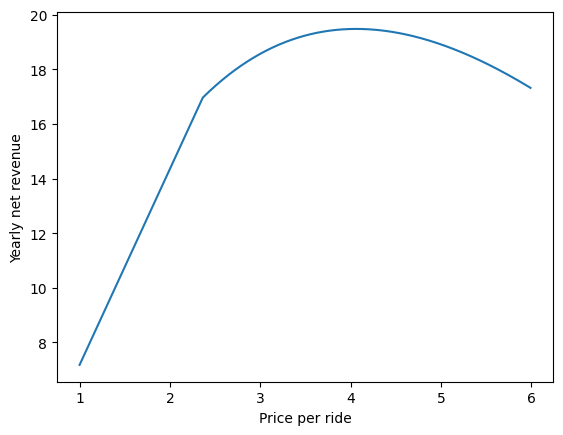

In [19]:
# Now we can plot the yearly net revenue as a function of the price per ride
import matplotlib.pyplot as plt
import numpy as np

# Create a list of prices per ride
price_per_ride = np.arange(1, 6, 0.01)

# Calculate the yearly net revenue for each price per ride
yearly_net_revenue_list = []
for i in price_per_ride:
    yearly_net_revenue_list.append(yearly_net_revenue(i))

# Plot the yearly net revenue as a function of the price per ride
plt.plot(price_per_ride, yearly_net_revenue_list)
plt.xlabel('Price per ride')
plt.ylabel('Yearly net revenue')
plt.show()


In [20]:
# Now we can optimize the price per ride to maximize the yearly net revenue
# We can use the scipy.optimize.minimize function to find the price per ride that maximizes the yearly net revenue

from scipy.optimize import minimize

# Define a function that returns the negative of the yearly net revenue
def negative_yearly_net_revenue(price_per_ride):
    return -yearly_net_revenue(price_per_ride)

# Find the price per ride that maximizes the yearly net revenue
result = minimize(negative_yearly_net_revenue, 3, method='SLSQP', bounds=[(1, 6)])
price_per_ride_optimized = result.x[0]
price_per_ride_optimized


4.06155730859357